<a href="https://colab.research.google.com/github/mmetaleno4ka/AI_testing/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Start writing my first AI
It's my first attempt to write AI with using libraries and common methods of machine learning. We have completed dataset and we will work with this directory. AI will learn how to distinguish different types od flowers.

Dataset directory: /root/.keras/datasets/flower_photos
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Epoch 1/10
92/92 [==============================] - 198s 2s/step - loss: 1.4325 - accuracy: 0.3859 - val_loss: 1.0880 - val_accuracy: 0.5341
Epoch 2/10
92/92 [==============================] - 185s 2s/step - loss: 1.0700 - accuracy: 0.5634 - val_loss: 1.0901 - val_accuracy: 0.5913
Epoch 3/10
92/92 [==============================] - 184s 2s/step - loss: 0.9994 - accuracy: 0.6124 - val_loss: 0.9264 - val_accuracy: 0.6526
Epoch 4/10
92/92 [==============================] - 184s 2s/step - loss: 0.9094 - accuracy: 0.6502 - val_loss: 0.9926 - val_accuracy: 0.6172
Epoch 5/10
92/92 [==============================] - 184s 2s/step - loss: 0.8897 - accuracy: 0.6574 - val_loss: 0.9259 - val_accuracy: 0.6567
Epoch 6/10
92/92 [========

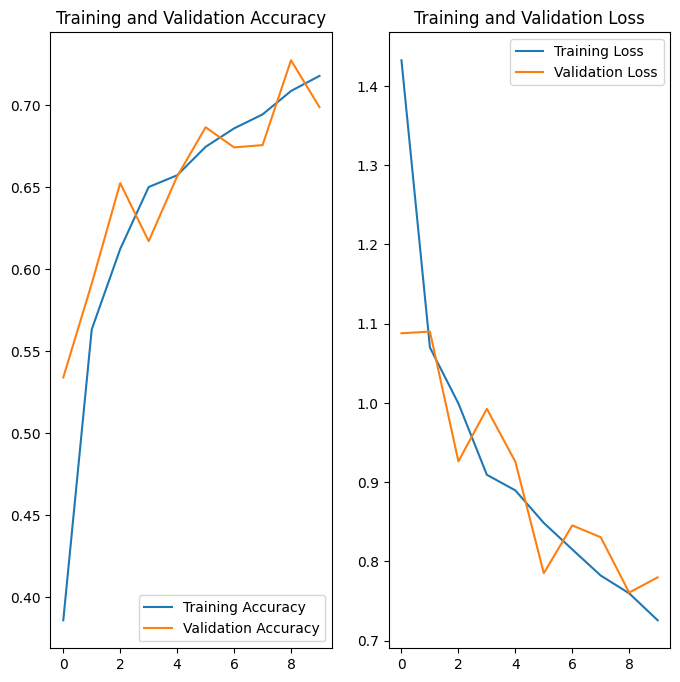

1/1 [==============================] - 0s 117ms/step


NameError: name 'np' is not defined

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pathlib

# Визначте параметри
num_classes = 10  # Кількість класів у вашій задачі
img_height = 224
img_width = 224
batch_size = 32

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
dataset_dir = pathlib.Path(dataset_dir)

print(f"Dataset directory: {dataset_dir}")



# Завантаження тренувального набору даних
train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Завантаження валідаційного набору даних
val_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Використання AUTOTUNE для оптимізації
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Приклад архітектури моделі
model = Sequential([

    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.2),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

epochs = 10  # Кількість епох тренування

# Навчання моделі
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Отримання метрик з об'єкта history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Візуалізація
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

sunflower_url = "https://www.vashsad.ua/downloads/image/7863/img_10.jpg"
sunflower_path = tf.keras.utils.get_file('img_10', origin=sunflower_url)

img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Скоріш за все на зображенні {} ({:.2f}% ймовірність)".format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))

img.show()

model.save_weights('my_flowers_model')
print("model saved")


##Graphic explanation
In this graphic we can see training accuracy and validation accuracy and in this case everething seems pretty good, because training accuracy is smooth line and validation is not that bad, but we understand that result is not perfect.

##Testing
In this part I'm already testing on real example if AI is teached correct and if there are good  training accuracy and validation accuracy. Result will be good if probability is higher than 80%. It's not perfect, but it's only begginig of learning ML and AI details.

In [ ]:
import numpy as np

sunflower_url = "https://gradinamax.com.ua/uploads/catalog_products/troyanda-chayno-gibridna-pisnya-okeanu_1.jpg"
sunflower_path = tf.keras.utils.get_file('troyanda-chayno-gibridna-pisnya-okeanu_1', origin=sunflower_url)

img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Скоріш за все на зображенні {} ({:.2f}% ймовірність)".format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))

img.show()

1/1 [==============================] - 0s 55ms/step
Скоріш за все на зображенні roses (80.48% ймовірність)
